In [10]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading And Plotting

In [6]:
df = pd.read_csv("data/AAPL.csv")
# Quiz: Print last 5 rows of the data frame
# print df              # prints entire data set (dataframe)
# print df.head()       # prints first five records
df.tail()       # prints last five records

,Date,Open,High,Low,Close,Volume,Adj Close
3170,2000-02-07,108.00,114.25,105.94,114.06,15770800,28.39
3171,2000-02-04,103.94,110.00,103.62,108.00,15206800,26.88
3172,2000-02-03,100.31,104.25,100.25,103.31,16977600,25.72
3173,2000-02-02,100.75,102.12,97.00,98.81,16588800,24.60
3174,2000-02-01,104.00,105.00,100.00,100.25,11380000,24.96


In [7]:
df['Close'].max() # compute and return max

# Quiz: Compute and return the mean volume for this stock
df['Volume'].mean()

21491431.338582676

0    669.79
1    660.59
2    662.74
3    680.44
4    676.27
Name: Adj Close, dtype: float64


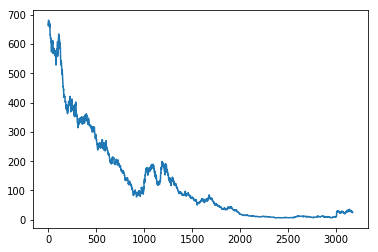

In [12]:
"""Plot a single column."""
df = pd.read_csv("data/AAPL.csv")
print(df['Adj Close'].head())
df['Adj Close'].plot()
plt.show()  # must be called to show plots

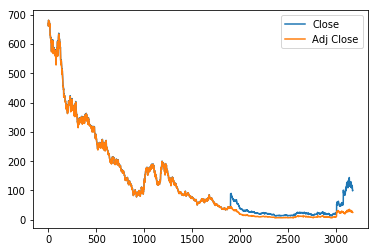

In [14]:
"""Plot Two Columns"""
df = pd.read_csv("data/AAPL.csv")
df[['Close', 'Adj Close']].plot()
plt.show()  # must be called to show plots

# Working With Multiple Stocks

In [15]:
start_date = '2010-01-22'
end_date = '2010-01-26';
dates=pd.date_range(start_date,end_date)

print(dates)
print(dates[0])  # get first element of list

DatetimeIndex(['2010-01-22', '2010-01-23', '2010-01-24', '2010-01-25',
               '2010-01-26'],
              dtype='datetime64[ns]', freq='D')
2010-01-22 00:00:00


In [16]:
# Create an empty dataframe
df1 = pd.DataFrame(index=dates)  # define empty dataframe with these dates as index
print(df1)

Empty DataFrame
Columns: []
Index: [2010-01-22 00:00:00, 2010-01-23 00:00:00, 2010-01-24 00:00:00, 2010-01-25 00:00:00, 2010-01-26 00:00:00]


In [18]:
# Read SPY data into temporary dataframe
# dfSPY = pd.read_csv("data/SPY.csv") # will result in no data because this has index of integers
# dfSPY = pd.read_csv("data/SPY.csv", index_col="Date", parse_dates=True)
dfSPY = pd.read_csv("data/SPY.csv", index_col="Date",
parse_dates=True, usecols=['Date','Adj Close'],
na_values=['nan'])
print(dfSPY.head())

            Adj Close
Date                 
2012-09-12     144.39
2012-09-11     143.91
2012-09-10     143.51
2012-09-07     144.33
2012-09-06     143.77


In [20]:
# Join the two dataframes using DataFram.join()
df1=df1.join(dfSPY)
print(df1)
# Drop NaN Values
df1 = df1.dropna()
print(df1)

            Adj Close
2010-01-22     104.34
2010-01-23        NaN
2010-01-24        NaN
2010-01-25     104.87
2010-01-26     104.43
            Adj Close
2010-01-22     104.34
2010-01-25     104.87
2010-01-26     104.43


In [49]:
'''Read in More Stocks'''
start_date = '2010-01-22'
end_date = '2010-01-26';
dates = pd.date_range(start_date, end_date)

# Create an empty dataframe
df1 = pd.DataFrame(index=dates)  # define empty dataframe with these dates as index

# Read SPY data into temporary dataframe
dfSPY = pd.read_csv("data/SPY.csv", index_col="Date",
                    parse_dates=True, usecols=['Date', 'Adj Close'],
                    na_values=['nan'])

# Rename 'Adj Close' column to 'SPY' to prevent clash
dfSPY = dfSPY.rename(columns={'Adj Close': 'SPY'})

# Join the two dataframes using DataFram.join()
df1 = df1.join(dfSPY, how='inner')

# Read in more stocks
symbols = ['GOOG', 'IBM', 'GLD']
for symbol in symbols:
    df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col='Date',
                    parse_dates=True, usecols=['Date', 'Adj Close'],
                    na_values=['nan'])
    df_temp = df_temp.rename(columns={'Adj Close': symbol})
    df1 = df1.join(df_temp)
print(df1)

               SPY    GOOG     IBM     GLD
2010-01-22  104.34  550.01  119.61  107.17
2010-01-25  104.87  540.00  120.20  107.48
2010-01-26  104.43  542.42  119.85  107.56


In [50]:
'''Set up Utility function to make things easier'''
import os
import pandas as pd

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # Quiz: Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
    return df


In [53]:
dates = pd.date_range('2010-01-01', '2010-12-31')

# Choose stock symbols to read
symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()

# Get stock data
df = get_data(symbols, dates)

# Slice by row range (dates) using DataFram.ix[] selector
print(df.loc['2010-01-01':'2010-01-31'])  # the month of January

#  Slice by column (symbols)
print(df['GOOG']) # a single label selects a single column
print(df[['IBM', 'GLD']]) # a list of labels selects multiple columns

# Slice by row and column
print(df.loc['2010-03-01':'2010-03-15', ['SPY', 'IBM']])


               SPY    GOOG     IBM     GLD
2010-01-04  108.27  626.75  126.24  109.80
2010-01-05  108.56  623.99  124.71  109.70
2010-01-06  108.64  608.26  123.90  111.51
2010-01-07  109.10  594.10  123.47  110.82
2010-01-08  109.46  602.02  124.71  111.37
2010-01-11  109.61  601.11  123.41  112.85
2010-01-12  108.59  590.48  124.39  110.49
2010-01-13  109.51  587.09  124.12  111.54
2010-01-14  109.80  589.85  126.10  112.03
2010-01-15  108.57  580.00  125.60  110.86
2010-01-19  109.93  587.62  127.85  111.52
2010-01-20  108.81  580.41  124.14  108.94
2010-01-21  106.72  582.98  122.95  107.37
2010-01-22  104.34  550.01  119.61  107.17
2010-01-25  104.87  540.00  120.20  107.48
2010-01-26  104.43  542.42  119.85  107.56
2010-01-27  104.93  542.10  120.40  106.53
2010-01-28  103.73  534.29  117.94  106.48
2010-01-29  102.60  529.94  116.65  105.96
2010-01-04    626.75
2010-01-05    623.99
2010-01-06    608.26
2010-01-07    594.10
2010-01-08    602.02
2010-01-11    601.11
2010-01-12    

In [54]:
def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

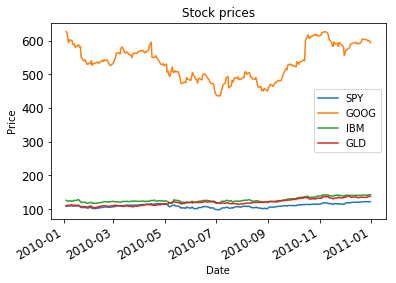

In [55]:
dates = pd.date_range('2010-01-01', '2010-12-31')

# Choose stock symbols to read
symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
    
# Get stock data
df = get_data(symbols, dates)

# Plot
plot_data(df)

In [57]:
def normalize_data(df):
    """Normalize stock prices using the first row of the dataframe."""
    return df/ df.ix[0,:] 

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # Quiz: Your code here
    plot_data(df.loc[start_index:end_index,columns], title="Selected data")

               SPY    GOOG     IBM     GLD
2010-01-04  108.27  626.75  126.24  109.80
2010-01-05  108.56  623.99  124.71  109.70
2010-01-06  108.64  608.26  123.90  111.51
2010-01-07  109.10  594.10  123.47  110.82
2010-01-08  109.46  602.02  124.71  111.37
2010-01-11  109.61  601.11  123.41  112.85
2010-01-12  108.59  590.48  124.39  110.49
2010-01-13  109.51  587.09  124.12  111.54
2010-01-14  109.80  589.85  126.10  112.03
2010-01-15  108.57  580.00  125.60  110.86


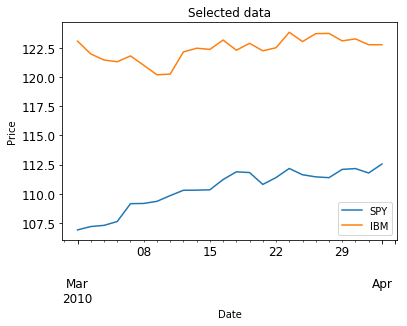

In [59]:
dates = pd.date_range('2010-01-01', '2010-12-31')

# Choose stock symbols to read
symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
    
# Get stock data
df = get_data(symbols, dates)
print(df.head(10))

# Slice and plot
plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')

# The Power of Numpy

In [65]:
import numpy as np
# List of tuples to 2D array
np.array([(2, 3, 4), (5, 6, 7)])

array([[2, 3, 4],
       [5, 6, 7]])

In [67]:
# Empty array
np.empty((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [69]:
# Array of 1s
np.ones((2, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [73]:
# Specifying the datatype
np.ones((3, 2), dtype=np.int)

array([[1, 1],
       [1, 1],
       [1, 1]])

In [82]:
# Generate an array full of random numbers, uniformly samples from [0.0, 1.0)
np.random.random((2, 3)) # pass in a size tuple

array([[0.87505966, 0.54627297, 0.42723574],
       [0.51353514, 0.61987763, 0.24858988]])

In [83]:
# Generate an array full of random numbers, uniformly samples from [0.0, 1.0)
np.random.rand(3, 2) # function arguments (not a tuple)

array([[0.058569  , 0.00673036],
       [0.81573945, 0.13609789],
       [0.5373811 , 0.48024855]])

In [85]:
# Sample numbers from a Gaussian (normal) distribution
np.random.normal(size=(2, 3)) # "standard normal" (mean = 0, s.d. = 1)

array([[-0.868616  ,  0.763594  ,  0.02618534],
       [-1.86295974, -1.1845567 ,  0.7225428 ]])

In [87]:
# Sample numbers from a Gaussian (normal) distribution
np.random.normal(50, 10, size=(2, 3)) # change mean to 50 and s.d. to 10

array([[43.2040975 , 60.69584426, 41.22972087],
       [51.06037852, 46.64454447, 62.50607033]])

In [88]:
a = np.random.random((5, 4))  # 5x4 array of random numbers
a.shape[1]

4

In [89]:
np.random.seed(693)  # seed the random number generator
a = np.random.randint(0, 10, size=(5, 4)) # 5x4 random integers in [0, 10)

# Sum of all elements
print("Sum of all elements:", a.sum())

# Iterate over rows, to compute sum of each columns
print("Sum of each column:\n", a.sum(axis=0))

# Iterate over columns to compute sume of each rows
print("Sum of each row:\n", a.sum(axis=1))

# Statistics: min, max, mean (across rows, cols, and overall)
print("Minimum of each colulmn:\n", a.min(axis=0))
print("Maximum of each row:\n", a.max(axis=1))
print("Mean of all elements:", a.mean()) # leave out axis arg.

Sum of all elements: 79
Sum of each column:
 [25 15 25 14]
Sum of each row:
 [ 8 12 21 24 14]
Minimum of each colulmn:
 [1 0 0 1]
Maximum of each row:
 [5 4 9 9 7]
Mean of all elements: 3.95


In [92]:
a = np.array([9, 6, 2, 3, 12, 14, 7, 10], dtype=np.int32)  # 32-bit integer array
 # Find the maximum and its index in array
print("Maximum value:", a.max())
print("Index of max.:", np.argmax(a))

Maximum value: 14
Index of max.: 5


In [94]:
import time
t1 = time.time()
print("ML4T")
t2 = time.time()
print("The time taken by print statement is ", t2 - t1, " seconds")

ML4T
The time taken by print statement is  0.0  seconds


# Statistical Analysis of Time Series

In [95]:
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
    return df

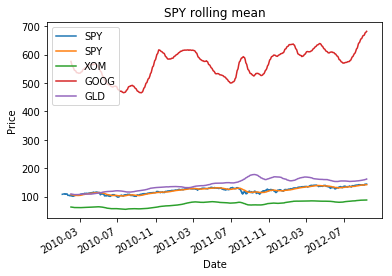

In [103]:
dates = pd.date_range('2010-01-01', '2012-12-31')
symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
df = get_data(symbols, dates)

# Plot SPY, retain matplotlib axis object
ax = df['SPY'].plot(title="SPY rolling mean", label='SPY')

# Compute rolling mean using a 20-day window
rm_SPY = df.rolling(window=20,center=False).mean()

# Add rolling mean to same plot
rm_SPY.plot(label='Rolling mean', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

In [108]:
def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window=window).mean()

def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # Quiz: Compute and return rolling standard deviation
    return values.rolling(window=window).std()

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # Quiz: Compute upper_band and lower_band
    upper_band = rm + rstd * 2
    lower_band = rm - rstd * 2
    return upper_band, lower_band

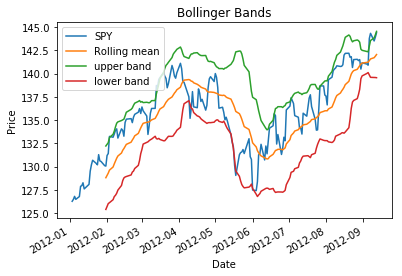

In [109]:
# Read data
dates = pd.date_range('2012-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

# Compute Bollinger Bands
# 1. Compute rolling mean
rm_SPY = get_rolling_mean(df['SPY'], window=20)

# 2. Compute rolling standard deviation
rstd_SPY = get_rolling_std(df['SPY'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
# Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

In [115]:
'''Compute Daily Return'''
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # Quiz: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_returns = df.copy()
    # daily_returns[1:] = (df[1:] / df[:-1].values) - 1 # compute daily returns for row 1 onwards
    daily_returns = (df / df.shift(1)) - 1 # much easier with Pandas!
    daily_returns.iloc[0, :] = 0 # Pandas leaves the 0th row full of Nans
    return daily_returns

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

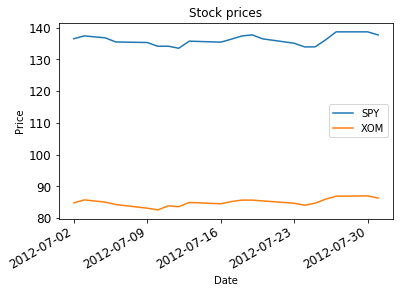

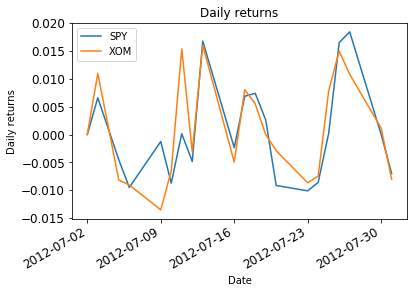

In [116]:
dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
symbols = ['SPY','XOM']
df = get_data(symbols, dates)
plot_data(df)

daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

# Incomplete Data

In [125]:
def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    # QUIZ: Your code here (DO NOT modify anything else)
    df_data.fillna(method="ffill", inplace = True)
    df_data.fillna(method="bfill", inplace = True)
    pass

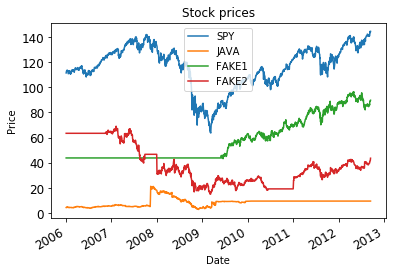

In [126]:
symbol_list = ["JAVA", "FAKE1", "FAKE2"]  # list of symbols
start_date = "2005-12-31"
end_date = "2014-12-07"
dates = pd.date_range(start_date, end_date)  # date range as index
df_data = get_data(symbol_list, dates)  # get data for each symbol

# Fill missing values
fill_missing_values(df_data)

# Plot
plot_data(df_data)

# Histograms And Scatter Plots

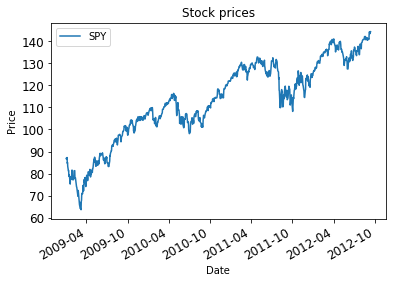

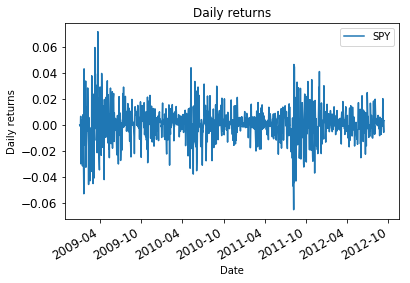

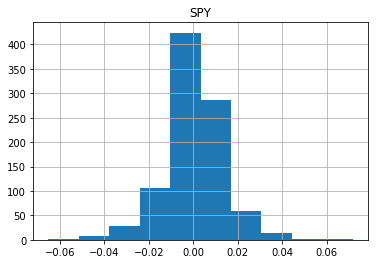

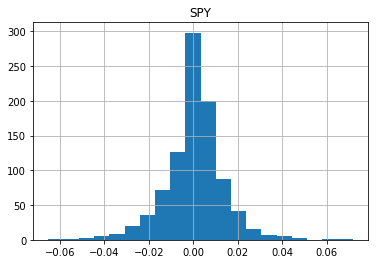

In [127]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)
plot_data(df)

# Compute daily returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

# Plot a histogram
daily_returns.hist()  # default number of bins, 10
daily_returns.hist(bins=20)  # changing no. of bins to 20
plt.show()

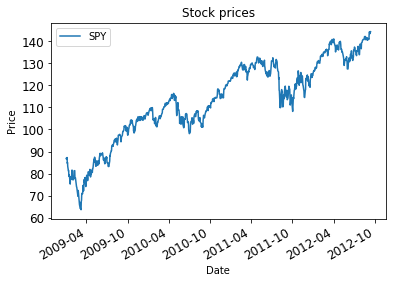

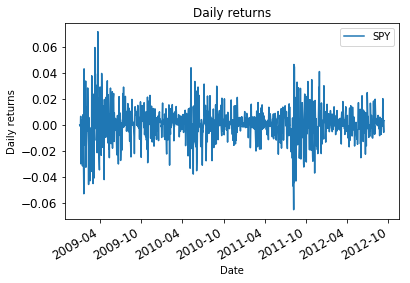

mean= 0.0006355783322251791
std= 0.013370490899409858


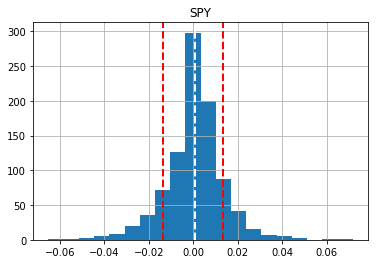

SPY    3.220278
dtype: float64


In [129]:
# Read data
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)
plot_data(df)

# Compute daily returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

# Plot a histogram
daily_returns.hist(bins=20)  # changing no. of bins to 20

# Get mean and standard deviation
mean = daily_returns['SPY'].mean()
print("mean=", mean)
std = daily_returns['SPY'].std()
print("std=", std)

plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.show()

# Compute kurtosis
print(daily_returns.kurtosis())

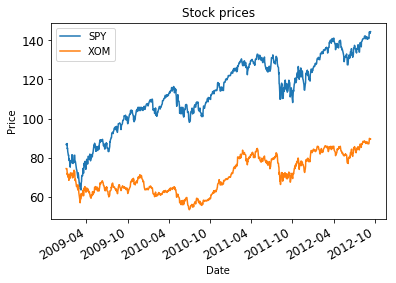

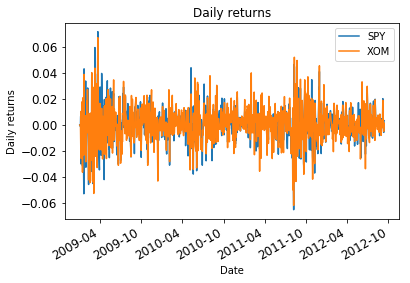

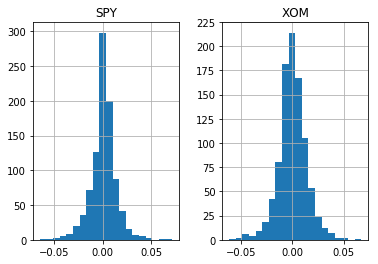

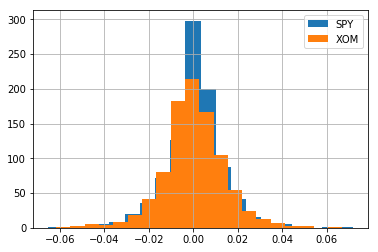

In [130]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY', 'XOM']
df = get_data(symbols, dates)
plot_data(df)

""" Two separate histograms ==========="""
# Compute daily returns
daily_returns = compute_daily_returns(df)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

# Plot a histogram
daily_returns.hist(bins=20) 
plt.show()

""" Histograms on the same graph ======"""
# Compute daily returns
daily_returns = compute_daily_returns(df)

# Compute and plot both histograms on the same chart
daily_returns['SPY'].hist(bins=20, label="SPY")
daily_returns['XOM'].hist(bins=20, label="XOM")
plt.legend(loc='upper right')
plt.show()

beta_XOM=  0.8507462236725956
alpha_XOM= -0.0002468672766800909


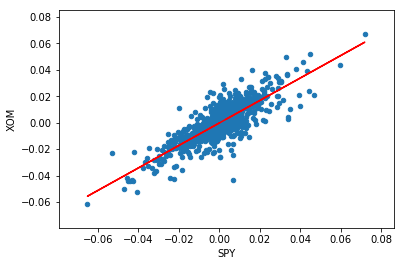

beta_GLD=  0.059761134832225046
alpha_GLD= 0.0007478811161601733


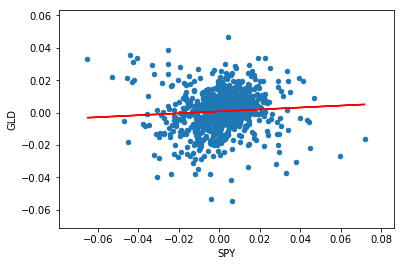

In [131]:
dates = pd.date_range('2009-01-01', '2012-12-31')
symbols = ['SPY', 'XOM', 'GLD']
df = get_data(symbols, dates)

# Compute daily returns
daily_returns = compute_daily_returns(df)

# Scatterplot SPY vs XOM
daily_returns.plot(kind='scatter', x='SPY', y='XOM')
beta_XOM, alpha_XOM= np.polyfit(daily_returns['SPY'], daily_returns['XOM'], 1)
print("beta_XOM= ", beta_XOM)
print("alpha_XOM=", alpha_XOM)
plt.plot(daily_returns['SPY'], beta_XOM*daily_returns['SPY'] + alpha_XOM, '-',color='r')
plt.show()

# Scatterplot SPY vs GLD
daily_returns.plot(kind='scatter', x='SPY', y='GLD')
beta_GLD, alpha_GLD= np.polyfit(daily_returns['SPY'], daily_returns['GLD'], 1)
print("beta_GLD= ", beta_GLD)
print("alpha_GLD=", alpha_GLD)
plt.plot(daily_returns['SPY'], beta_GLD*daily_returns['SPY'] + alpha_GLD, '-',color='r')
plt.show()

# Sharp Ratio and Other Portfolio Statistics

In [ ]:
start_val = 1000000
start_date = 2009-1-1
end_date = 2011-12-31
symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
allocs = [0.4, 0.4, 0.1, 0.1]

# Calculate portfolio value
normed = prices / prices[0]
alloced = normed * allocs
pos_vals = alloced * start_val
port_val = pos_vals.sum(axis=1)

# Calculate daily return
daily_rets = daily_rets[1:]
# Cumulative return
cum_ret = port_val[-1]/port_val[0] - 1
# Average daily return
avg_daily_ret = daily_rets.mean()
# standard derivation of daily return
std_daily_ret = daily_rets.std()

# Sharp Ratio
SR = sqrt(k) * mean(daily_rets - daily_rf) / std(daily_rets)


# Optimizer

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

"""Given a scalar X, return some value (a real number)."""
def f(X):
    Y = (X - 1.5)**2 + 0.5
    print("X = {}, Y = {}".format(X, Y)) # for tracing
    return Y

X = [2.], Y = [0.75]
X = [2.], Y = [0.75]
X = [2.00000001], Y = [0.75000001]
X = [0.99999999], Y = [0.75000001]
X = [1.5], Y = [0.5]
X = [1.5], Y = [0.5]
X = [1.50000001], Y = [0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at:
X = [1.5], Y = 0.5
X = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], Y = [1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


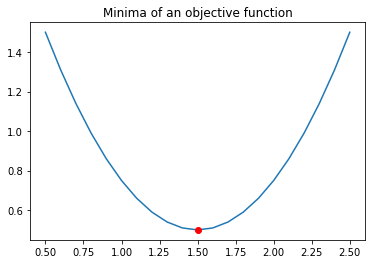

In [139]:
Xguess = 2.0
min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp': True})
print("Minima found at:")
print("X = {}, Y = {}".format(min_result.x, min_result.fun))

# Plot function values, mark minima
Xplot = np.linspace(0.5, 2.5, 21)
Yplot = f(Xplot)
plt.plot(Xplot, Yplot)
plt.plot(min_result.x, min_result.fun, 'ro')
plt.title("Minima of an objective function")
plt.show()

Original line: C0 = 4.0, C1 = 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 161.69695230550045
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
Fitted line: C0 = 3.9009182001871165, C1 = 2.9932134876609533


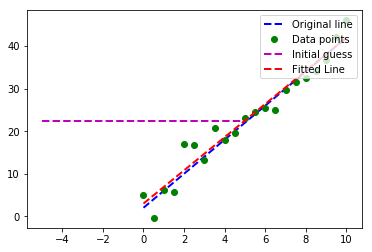

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

def error(line, data): # error function
	"""Compute error between given line model and observed data.
	
	Parameters
	----------
	line: tuple/list/array (C0, C1) where C0 is slope and C1 is Y-intercept
	data: 2D array where each row is a point (x, y)
	
	Returns error as a single real value.
	"""
	# Metric: Sum of squared Y-axis differences
	err = np.sum((data[:,1] - (line[0] * data[:, 0] + line[1])) ** 2)
	return err	
	
def fit_line(data, error_func):
	"""Fit a line to given data, using a supplied error function.
	
	Parameters
	----------
	data: 2D array where each row is a point (X0, Y)
	error_func: function that computes the error between a line and observed data
	
	Returns line that minimizes the error function.
	"""
	# Generate initial guess for line model 
	l = np.float32([0, np.mean(data[:, 1])])  # slope = 0, intercept = mean(y values)
	
	# Plot initial guess (optional)
	x_ends = np.float32([-5, 5])
	plt.plot(x_ends, l[0] * x_ends + l[1], 'm--', linewidth=2.0, label = "Initial guess")
	
	# Call optimizer to minimize error function
	result = spo.minimize(error_func, l, args=(data,), method = 'SLSQP', options={'disp': True})
	return result.x
	
def test_run():
	# Define original line
	l_orig = np.float32([4, 2])
	print ("Original line: C0 = {}, C1 = {}".format(l_orig[0], l_orig[1]))
	Xorig = np.linspace(0, 10, 21)
	Yorig = l_orig[0] * Xorig + l_orig[1]
	plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label="Original line")
	
	# Generate noisy data points
	noise_sigma = 3.0
	noise = np.random.normal(0, noise_sigma, Yorig.shape)
	data = np.asarray([Xorig, Yorig + noise]).T
	plt.plot(data[:,0], data[:, 1], 'go', label="Data points")
	
	# Try to fit a line to this data
	l_fit = fit_line(data, error)
	print ("Fitted line: C0 = {}, C1 = {}".format(l_fit[0], l_fit[1]) )
	plt.plot(data[:, 0], l_fit[0] * data[:, 0] + l_fit[1], 'r--', linewidth=2.0, label = "Fitted Line")
	
	# Add a legend and show plot
	plt.legend(loc='upper right')
	plt.show()
	
	
if __name__ == "__main__":
	test_run()

Original line: C0 = 3.0, C1 = 2.0, C2 = 1.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 20.441728866266985
            Iterations: 5
            Function evaluations: 33
            Gradient evaluations: 5
       2
3.012 x + 2.048 x + 0.8272
3.0124094364294716
Fitted line: C0 = 3.0124094364294716, C1 = 2.047863403147679, C2 = 0.8271817413280514


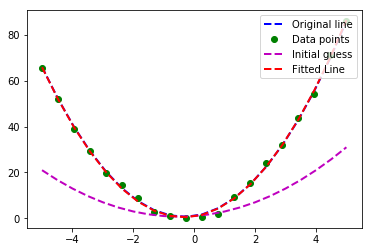

In [179]:
"""Minimize an objective function using SciPy: 3D"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

def error_poly(C, data): # error function
	"""Compute error between given polynomial and observed data.
	
	Parameters
	----------
	C: numpy.poly1d object or equivalent array representing polynomial coefficients
	data: 2D array where each row is a point (x, y)
	
	Returns error as a single real value.
	"""
	# Metric: Sum of squared Y-axis differences
	err = np.sum((data[:,1] - np.polyval(C, data[:,0])) ** 2)
	return err	
	
def fit_poly(data, error_func, degree=2):
	"""Fit a polynomial to given data, using a supplied error function.
	
	Parameters
	----------
	data: 2D array where each row is a point (X0, Y)
	error_func: function that computes the error between a polynomial and observed data
	
	Returns polynomial that minimizes the error function.
	"""
	# Generate initial guess for line model (all coeffs = 1)
	Cguess = np.poly1d(np.ones(degree + 1, dtype=np.float32))
	# Plot initial guess (optional)
	x = np.linspace(-5, 5, 21)
	plt.plot(x, np.polyval(Cguess, x), 'm--', linewidth=2.0, label = "Initial guess")
	
	# Call optimizer to minimize error function
	result = spo.minimize(error_func, Cguess, args=(data,), method = 'SLSQP', options={'disp': True})
	return np.poly1d(result.x) # convert optimal result into a poly1d object and return
	
def test_run():
	# Define original line
    l_orig = np.float32([3, 2, 1])
    print ("Original line: C0 = {}, C1 = {}, C2 = {}".format(l_orig[0], l_orig[1], l_orig[2]))
    Xorig = np.linspace(-5, 5, 20)
    Yorig = l_orig[0] * Xorig ** 2 + l_orig[1] * Xorig + l_orig[2]
    plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label="Original line")
	# Generate noisy data points
    noise_sigma = 1.0
    noise = np.random.normal(0, noise_sigma, Yorig.shape)
    data = np.asarray([Xorig, Yorig + noise]).T
    plt.plot(data[:,0], data[:, 1], 'go', label="Data points")
    # Try to fit a line to this data
    l_fit = fit_poly(data, error_poly, degree = 2)
    print(l_fit)
    print(l_fit[2])
    print ("Fitted line: C0 = {}, C1 = {}, C2 = {}".format(l_fit[2], l_fit[1], l_fit[0]) )
    plt.plot(data[:, 0], l_fit[2] * data[:, 0] *data[:, 0] + l_fit[1] * data[:, 0] + l_fit[0], 'r--', linewidth=2.0, label = "Fitted Line")

    # Add a legend and show plot
    plt.legend(loc='upper right')
    plt.show()

	
if __name__ == "__main__":
	test_run()